### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Загрузка данных

In [3]:
df_class = pd.read_csv("class.csv")

1. Class_Number Numeric (integer values in range [1,7])
2. Number_Of_Animal_Species_In_Class Numeric
3. Class_Type character - The actual word description of the class
4. Animal_Names character - The list of the animals that fall in the category of the class

In [4]:
df_animal = pd.read_csv("zoo.csv")

#### Информация об атрибуте: (имя атрибута и тип значения)

1. animal_name: Unique for each instance
2. hair: Boolean
3. feathers: Boolean
4. eggs: Boolean
5. milk: Boolean
6. airborne: Boolean
7. aquatic: Boolean
8. predator: Boolean
9. toothed: Boolean
10. backbone: Boolean
11. breathes Boolean
12. venomous Boolean
13. fins Boolean
14. legs Numeric (set of values: {0,2,4,5,6,8})
15. tail Boolean
16. domestic Boolean
17. catsize Boolean
18. class_type Numeric (integer values in range [1,7])

### EDA

In [5]:
df_animal.head(20)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [6]:
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [7]:
df_animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [8]:
df_class.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [9]:
df_animal.shape

(101, 18)

In [10]:
df_class.shape

(7, 4)

In [11]:
df_animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [12]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [13]:
df_animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
df_animal.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [15]:
df_class.columns

Index(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')

In [16]:
df_class["Class_Type"].unique()

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

In [17]:
df_animal["animal_name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [18]:
duplicates_animal = df_animal[df_animal.duplicated()]
print("Количество дубликатов в df_animal:", len(duplicates_animal))

duplicates_class = df_class[df_class.duplicated()]
print("Количество дубликатов в df_class:", len(duplicates_class))

Количество дубликатов в df_animal: 0
Количество дубликатов в df_class: 0


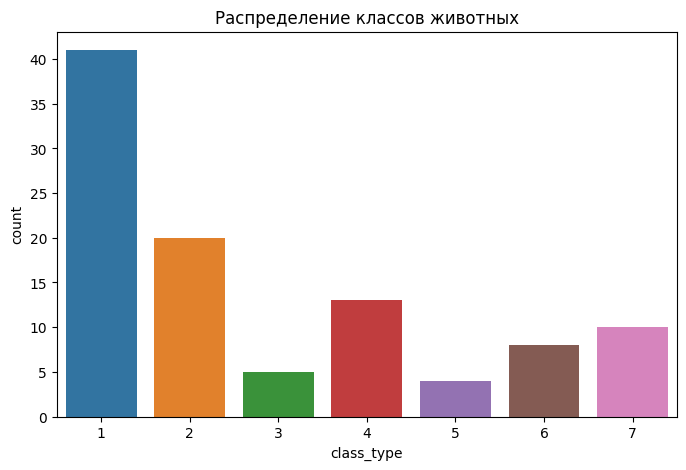

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='class_type', data=df_animal)
plt.title('Распределение классов животных')
plt.show()

Больше всего представителей класса млекопитающих

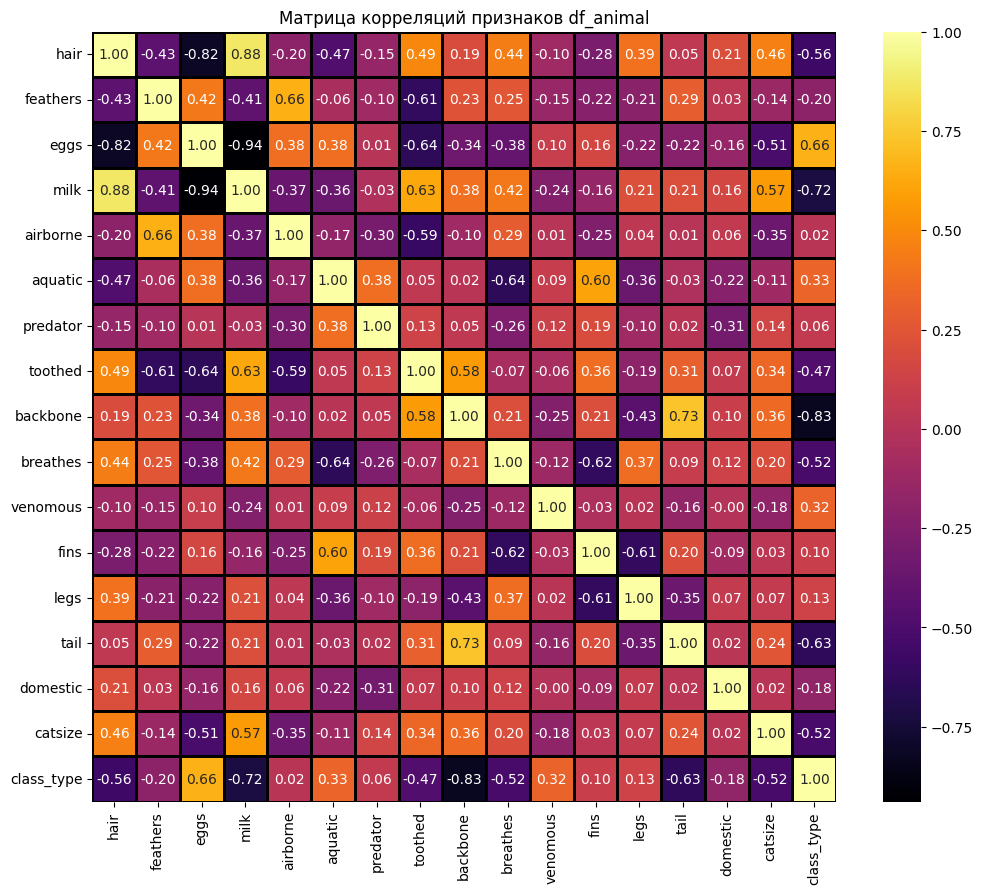

In [20]:
numeric_features = df_animal.select_dtypes(include=[np.number]).columns
correlation_matrix = df_animal[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Матрица корреляций признаков df_animal')
plt.show()

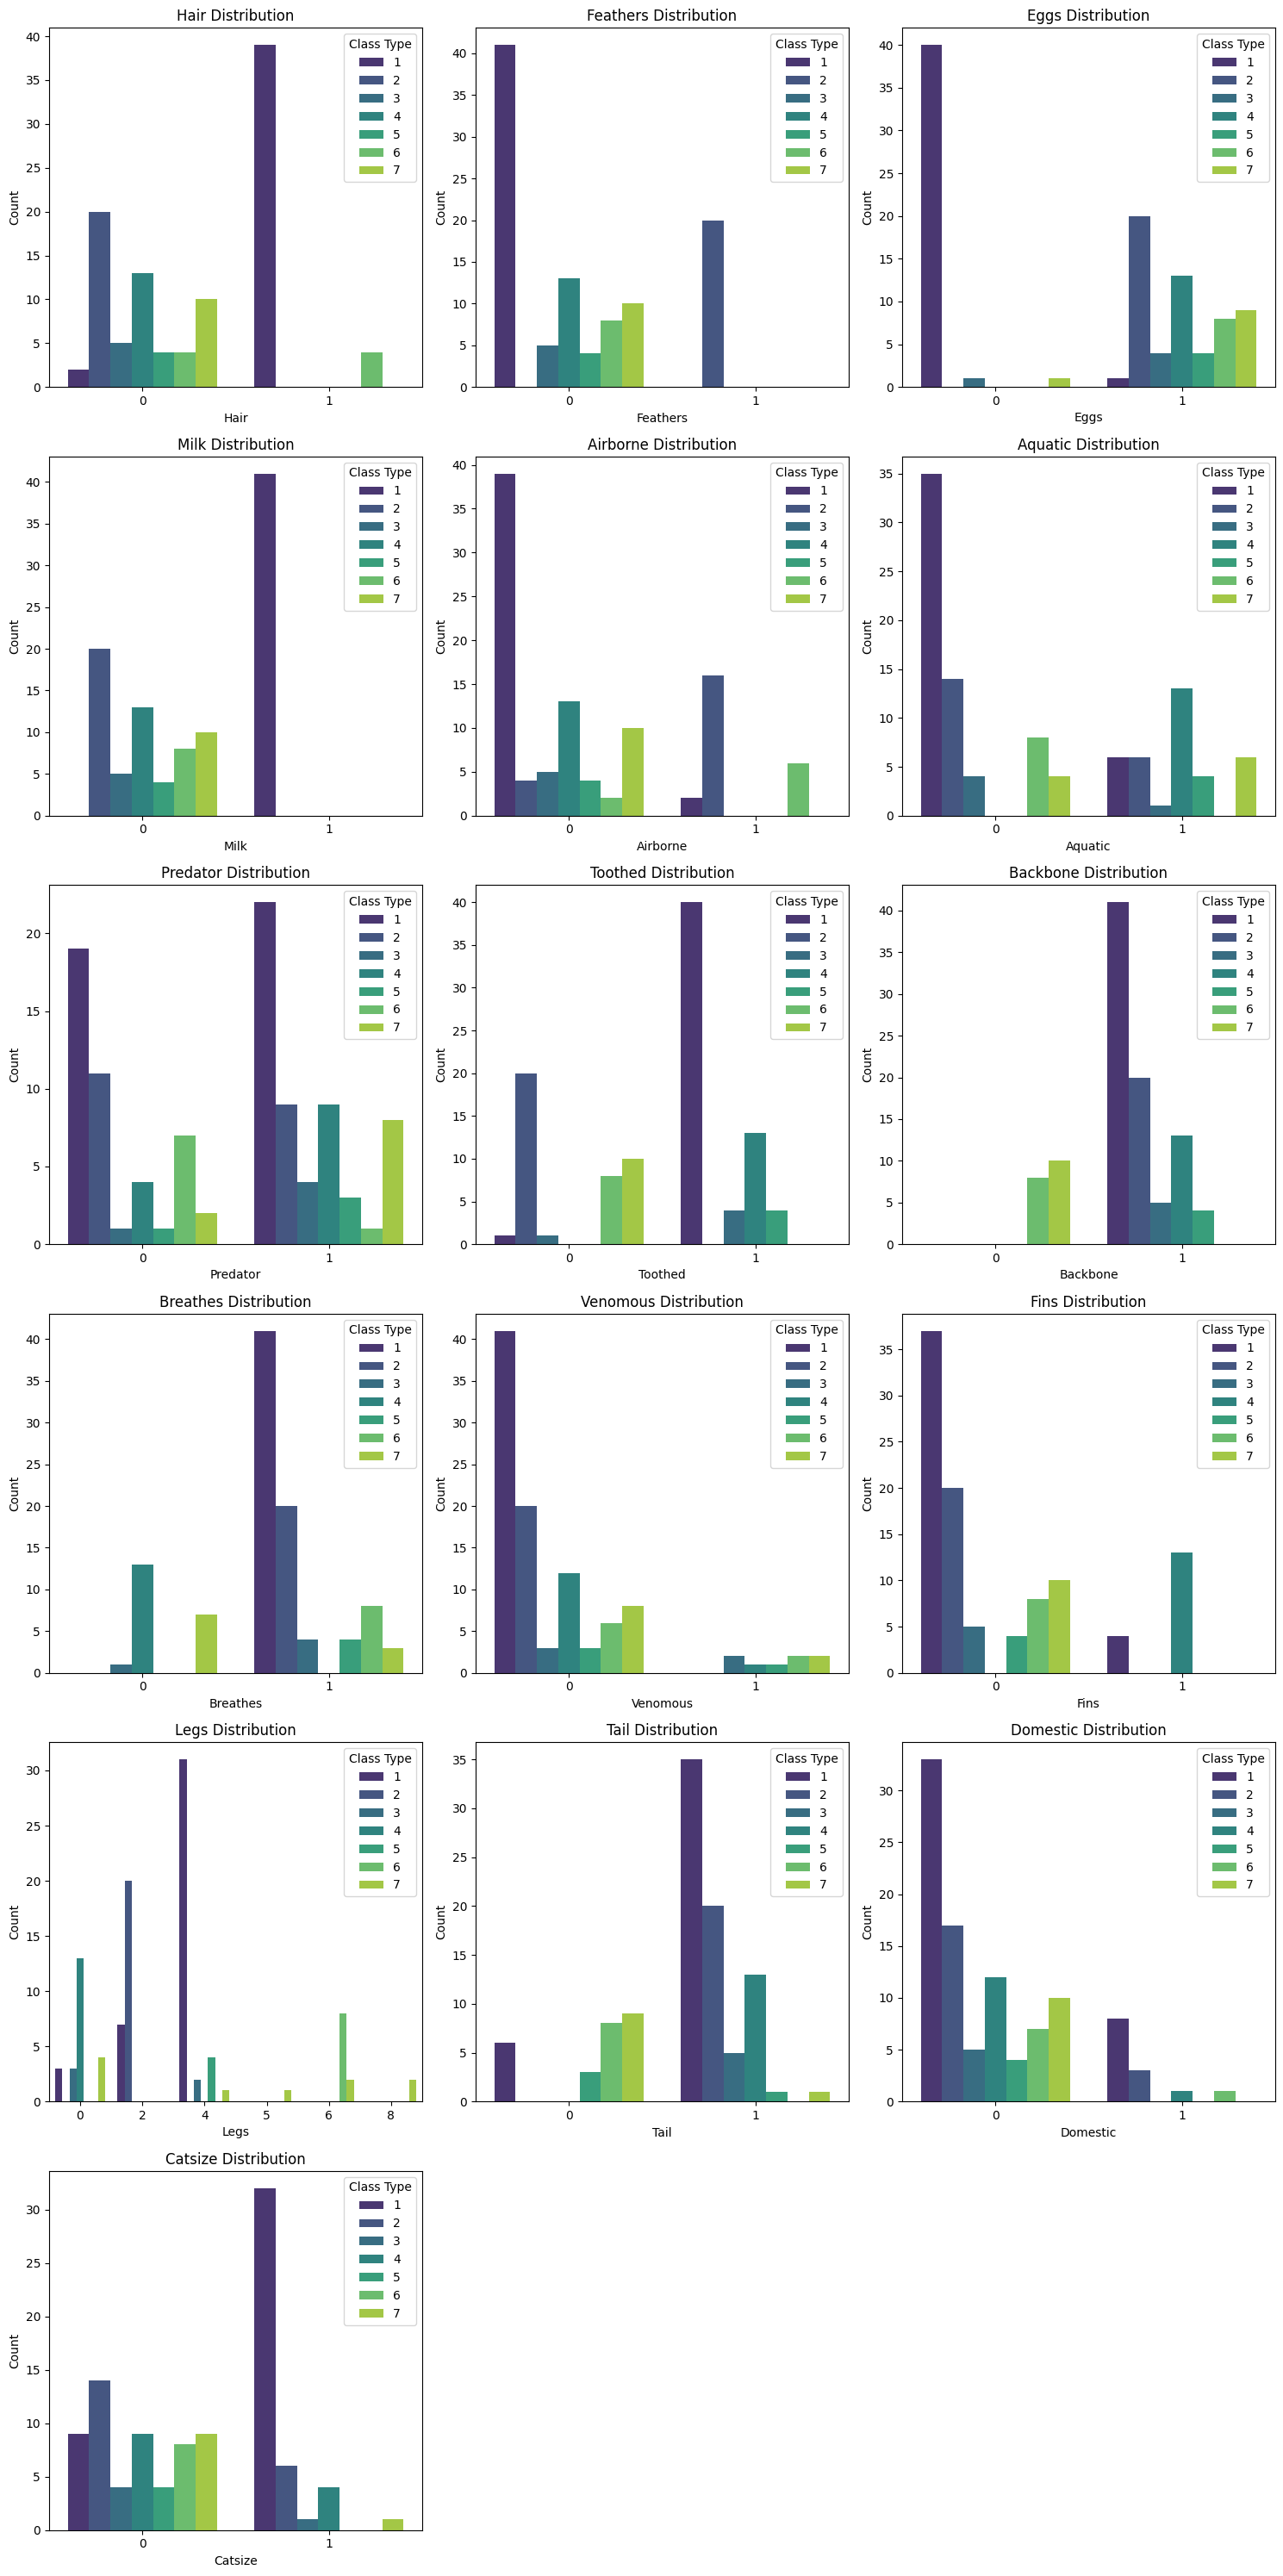

In [21]:
features = df_animal.columns[1:-1]

rows = (len(features) - 1) // 3 + 1
cols = min(len(features), 3)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i, feature in enumerate(features):
    row_idx = i // cols
    col_idx = i % cols
    sns.countplot(x=feature, data=df_animal, hue='class_type', palette="viridis", ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"{feature.capitalize()} Distribution")
    axes[row_idx, col_idx].set_xlabel(feature.capitalize())
    axes[row_idx, col_idx].set_ylabel("Count")
    axes[row_idx, col_idx].legend(title='Class Type')

if len(features) < rows * cols:
    for i in range(len(features), rows * cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### Разделение набора данных на обучающую и тестовую выборки. Нашей целью является прогноз типа класса животного на основе предоставленных данных. Следовательно, переменная class_type становится нашей меткой, а остальные атрибуты – X, представляющими входные данные для обучения и тестирования модели.

In [22]:
columns_to_drop = ["class_type", "animal_name"]
X = df_animal.drop(columns=columns_to_drop)
X.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


In [23]:
Y = df_animal["class_type"]
Y.head(10)

0    1
1    1
2    4
3    1
4    1
5    1
6    1
7    4
8    4
9    1
Name: class_type, dtype: int64

### Разделения данных на обучающий и тестовый наборы

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [25]:
len(X_train), len(X_test)

(70, 31)

### Random Forest Classifier

In [26]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
accuracy_randomForest = rfc.score(X_test, Y_test)
print("accuracy =", round(accuracy_randomForest * 100, 2), "%")

accuracy = 93.55 %


### Logistic Regression

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
accuracy_logistic = logreg.score(X_test, Y_test)
print("Accuracy =", round(accuracy_logistic * 100, 2), "%")

Accuracy = 93.55 %


### KNN

### Кросс-валидация с количеством разбиений выборки = 5

In [28]:
k_values = list(range(1, 20))

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[cv_scores.index(max(cv_scores))]

In [29]:
optimal_k

1

In [30]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
X_train_np = np.array(X_train)
y_train_np = np.array(Y_train)
X_test_np = np.array(X_test)
knn.fit(X_train_np, y_train_np)
y_pred = knn.predict(X_test_np)
accuracy_knn = accuracy_score(Y_test, y_pred)
print("Accuracy =", round(accuracy_knn * 100, 2), "%")

Accuracy = 100.0 %


### CatBoost Classifier

In [31]:
catboost_classifier = CatBoostClassifier(iterations=30)
catboost_classifier.fit(X_train, Y_train)
accuracy_catboost = catboost_classifier.score(X_test,Y_test)
print("Accuracy =", round(accuracy_catboost * 100, 2), "%")

Learning rate set to 0.5
0:	learn: 1.1721563	total: 164ms	remaining: 4.75s
1:	learn: 0.8594476	total: 169ms	remaining: 2.36s
2:	learn: 0.6727791	total: 173ms	remaining: 1.55s
3:	learn: 0.5178350	total: 175ms	remaining: 1.14s
4:	learn: 0.4379085	total: 180ms	remaining: 898ms
5:	learn: 0.3683583	total: 184ms	remaining: 737ms
6:	learn: 0.3269679	total: 188ms	remaining: 618ms
7:	learn: 0.2951029	total: 194ms	remaining: 532ms
8:	learn: 0.2643063	total: 197ms	remaining: 460ms
9:	learn: 0.2310631	total: 202ms	remaining: 403ms
10:	learn: 0.2095738	total: 206ms	remaining: 356ms
11:	learn: 0.1870681	total: 211ms	remaining: 316ms
12:	learn: 0.1677318	total: 215ms	remaining: 281ms
13:	learn: 0.1508496	total: 221ms	remaining: 253ms
14:	learn: 0.1403182	total: 232ms	remaining: 232ms
15:	learn: 0.1302246	total: 236ms	remaining: 206ms
16:	learn: 0.1195077	total: 241ms	remaining: 184ms
17:	learn: 0.1105197	total: 247ms	remaining: 165ms
18:	learn: 0.1043293	total: 256ms	remaining: 148ms
19:	learn: 0.098

### Gradient Boosting Classifier

In [32]:
grad_boost_classifier = GradientBoostingClassifier()
grad_boost_classifier.fit(X_train, Y_train)
accuracy_grad_boost = grad_boost_classifier.score(X_test,Y_test)
print("Accuracy =", round(accuracy_grad_boost * 100, 2), "%")

Accuracy = 96.77 %


### Матрицы ошибок

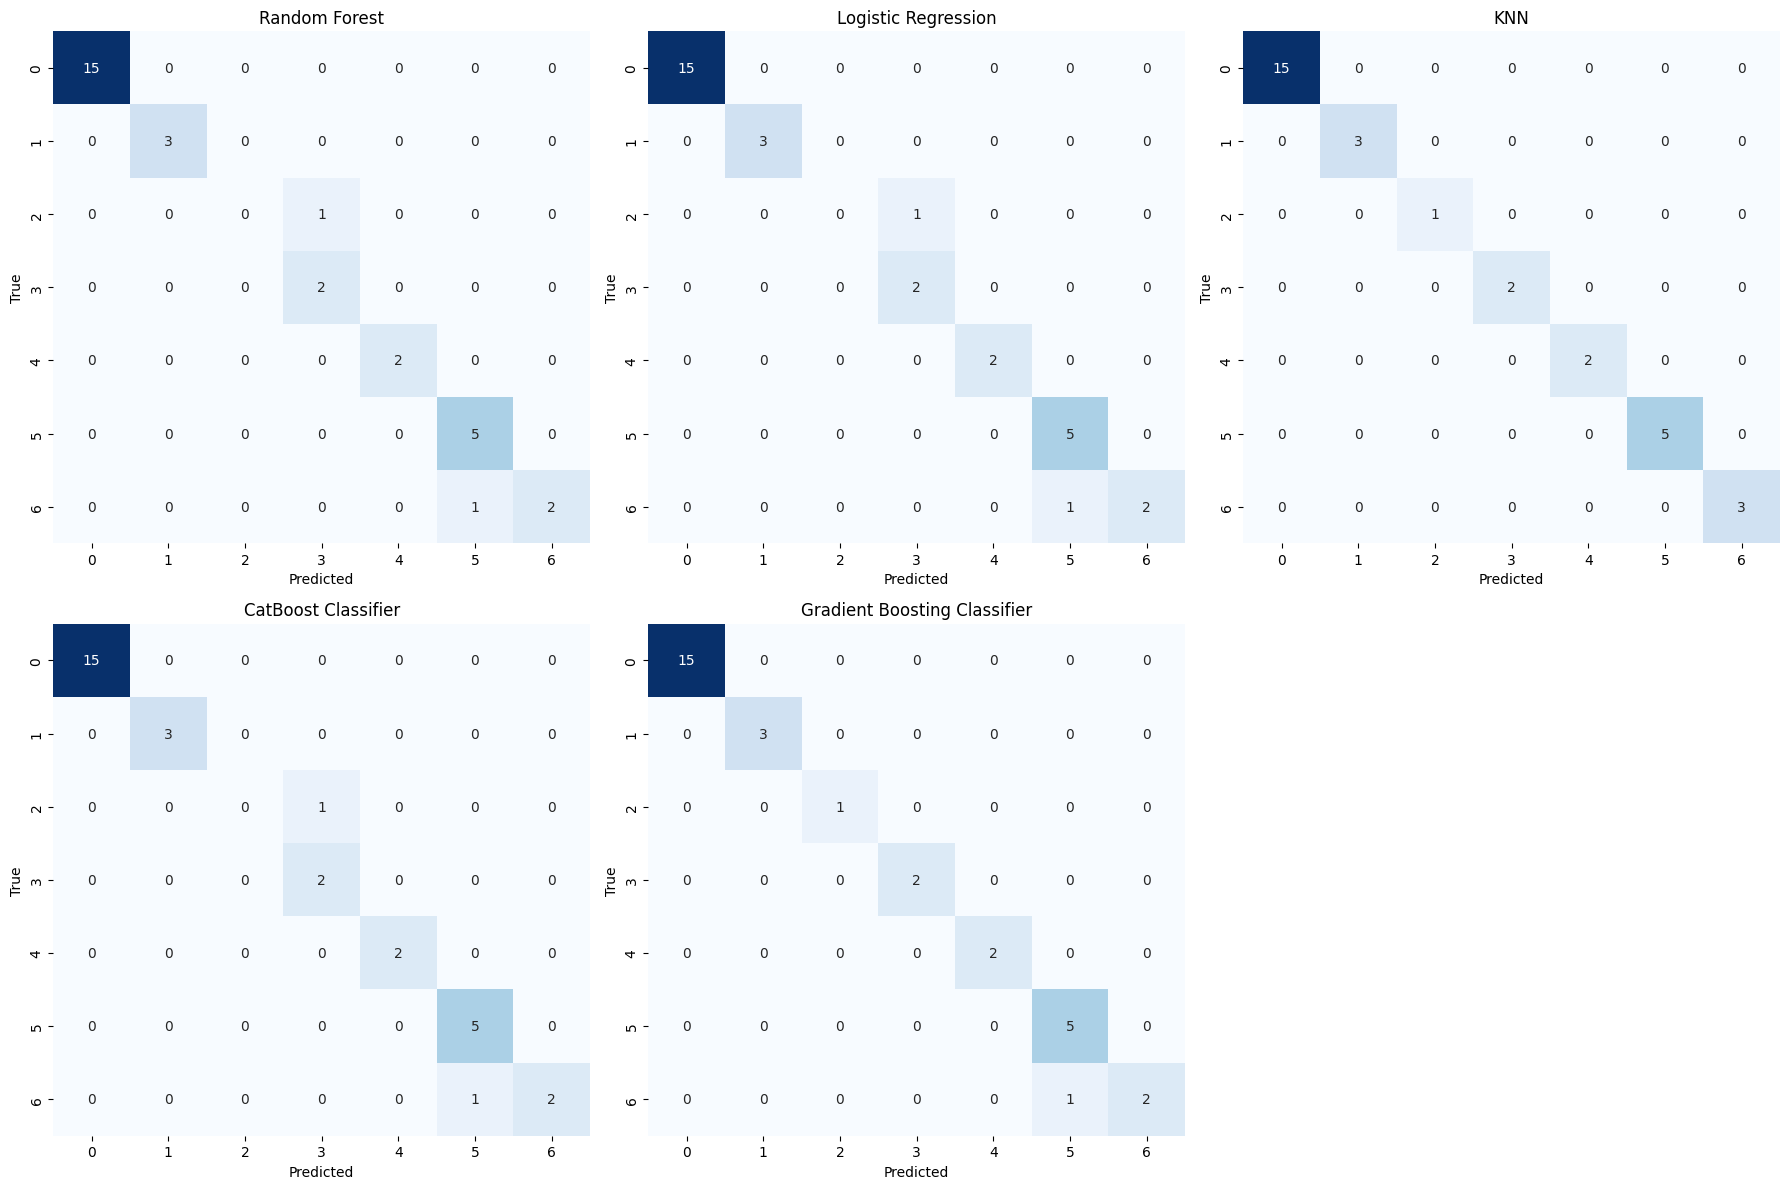

In [33]:
rfc_pred = rfc.predict(X_test)
rfc_cm = confusion_matrix(Y_test, rfc_pred)

logreg_pred = logreg.predict(X_test)
logreg_cm = confusion_matrix(Y_test, logreg_pred)

knn_pred = knn.predict(X_test_np)
knn_cm = confusion_matrix(Y_test, knn_pred)

catboost_pred = catboost_classifier.predict(X_test)
catboost_cm = confusion_matrix(Y_test, catboost_pred)

grad_boost_pred = grad_boost_classifier.predict(X_test)
grad_boost_cm = confusion_matrix(Y_test, grad_boost_pred)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.heatmap(rfc_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Random Forest')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')

sns.heatmap(logreg_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Logistic Regression')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')

sns.heatmap(knn_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[0, 2])
axes[0, 2].set_title('KNN')
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('True')

sns.heatmap(catboost_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('CatBoost Classifier')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')

sns.heatmap(grad_boost_cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('Gradient Boosting Classifier')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')
fig.delaxes(axes.flatten()[5])
plt.tight_layout()
plt.show()

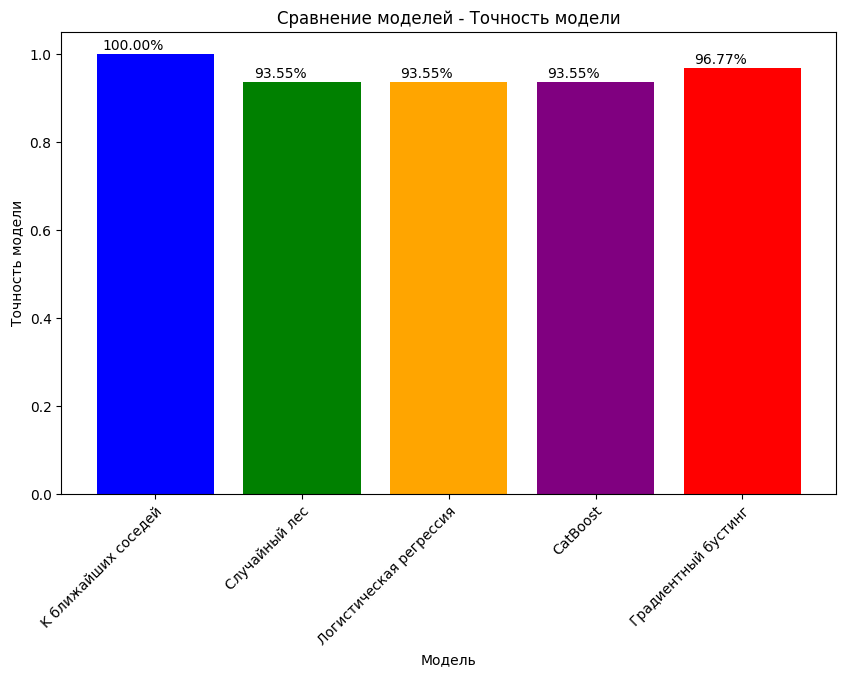

In [34]:
models = ["K ближайших соседей",
          "Случайный лес",
          "Логистическая регрессия",
          "CatBoost",
          "Градиентный бустинг"]

accuracies = [accuracy_knn,
              accuracy_randomForest,
              accuracy_logistic,
              accuracy_catboost,
              accuracy_grad_boost]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])

plt.title('Сравнение моделей - Точность модели')
plt.xlabel('Модель')
plt.ylabel('Точность модели')

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{accuracy:.2%}', ha='center')

plt.show()